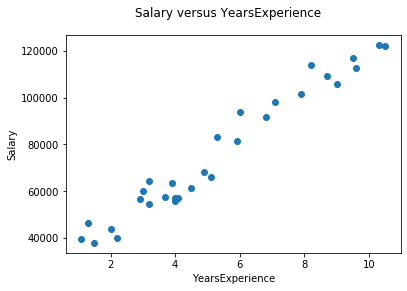

In [2]:
#load the data set into a Pandas DataFrame and plot the data set
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices
import numpy as np
from matplotlib import pyplot as plt
#Import the 7-variable subset of the automobiles dataset into a DataFrame
df = pd.read_csv('Salary_Data.csv', header=0)
#Plot price versus num_of_cylinders
fig = plt.figure()
fig.suptitle('Salary versus YearsExperience')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.scatter(x=df['YearsExperience'], y=df['Salary'])

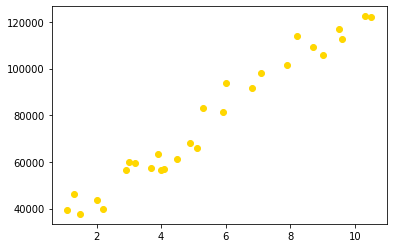

In [3]:
ye = np.array(df.groupby('YearsExperience')['YearsExperience'].mean())
conditional_means = np.array(df.groupby('YearsExperience')['Salary'].mean())

plt.scatter(x=ye, y=conditional_means, color='gold', marker='o')

plt.show()



In [4]:
reg_exp = 'Salary ~ YearsExperience'

In [5]:
y_train, X_train = dmatrices(reg_exp, df, return_type='dataframe')

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 14 Dec 2023   Prob (F-statistic):           1.14e-20
Time:                        05:52:10   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     

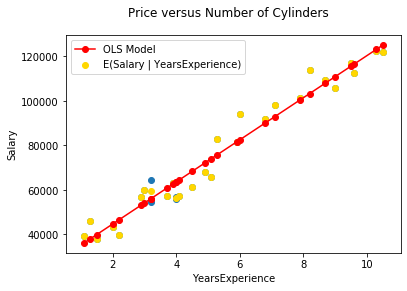

In [7]:
#Build and train an OLS regression model
olsr_model = sm.OLS(endog=y_train, exog=X_train)
olsr_model_results = olsr_model.fit()
print(olsr_model_results.summary())

#Plot the OLS regression line on the scatter plot of Price versus num_of_cylinders
fig = plt.figure()
fig.suptitle('Price versus Number of Cylinders')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.scatter(x=df['YearsExperience'], y=df['Salary'])
#Get the estimated conditional means from the trained OLS model
y_pred_ols = olsr_model_results.predict(X_train)
#Plot the estimated conditional means
ols, = plt.plot(X_train['YearsExperience'], y_pred_ols,
    color='red', marker='o', linestyle='solid', label='OLS Model')
#Also plot the observed conditional means i.e. E(price | num_of_cylinders)
conditional_mean_pts = plt.scatter(x=ye, y=conditional_means, c='gold', marker='o', label='E(Salary | YearsExperience)')

plt.legend(handles=[ols, conditional_mean_pts])
plt.show()

In [8]:
median_model = smf.quantreg(formula=reg_exp, data=df)

In [9]:
median_model_results = median_model.fit(q=0.5)

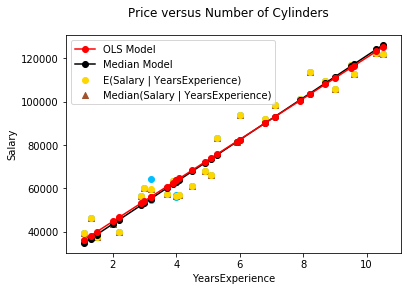

In [13]:
fig = plt.figure()
fig.suptitle('Price versus Number of Cylinders')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
#Show the scatter plot of price versus num_of_cylinders
plt.scatter(x=df['YearsExperience'], y=df['Salary'], c='deepskyblue')
#Get the estimated conditional medians from the median model
y_pred_median = median_model_results.predict(X_train)
#Plot the estimated conditional medians
median, = plt.plot(X_train['YearsExperience'], y_pred_median,
    color='black', marker='o', linestyle='solid',  label='Median Model')
#For comparison, also plot the estimated conditional means from the OLS model we built earlier
ols, = plt.plot(X_train['YearsExperience'], y_pred_ols,
    color='red', marker='o', linestyle='solid',  label='OLS Model')
#Calculate the observed conditional medians
conditional_medians = np.array(df.groupby('YearsExperience')['Salary'].median())
#Plot the observed conditional medians
conditional_median_pts = plt.scatter(x=ye, y=conditional_medians, c='sienna', marker='^', label='Median(Salary | YearsExperience)')
#For comparison, plot the observed conditional means
conditional_mean_pts = plt.scatter(x=ye, y=conditional_means, c='gold', marker='o', label='E(Salary | YearsExperience)')
#Set up the legend and show the plot
plt.legend(handles=[ols, median, conditional_mean_pts, conditional_median_pts])

plt.show()

C:\Users\aravi\Anaconda3\lib\site-packages\statsmodels\regression\quantile_regression.py:236: RuntimeWarning: invalid value encountered in less_equal
  kernels['epa'] = lambda u: 3. / 4 * (1-u**2) * np.where(np.abs(u) <= 1, 1, 0)
C:\Users\aravi\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\aravi\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\aravi\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


                         QuantReg Regression Results                          
Dep. Variable:                 Salary   Pseudo R-squared:               0.8020
Model:                       QuantReg   Bandwidth:                         nan
Method:                 Least Squares   Sparsity:                          nan
Date:                Thu, 14 Dec 2023   No. Observations:                   30
Time:                        05:57:10   Df Residuals:                       28
                                        Df Model:                            1
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         1.65e+04        nan        nan        nan         nan         nan
YearsExperience  9898.1633        nan        nan        nan         nan         nan
                         QuantReg Regression Results                          
Dep. Variable:                 S

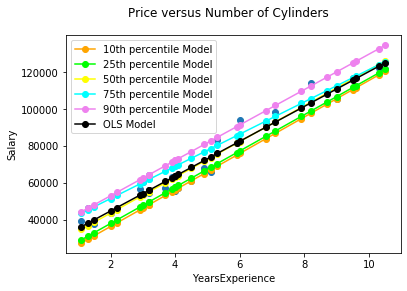

In [14]:
fig = plt.figure()
fig.suptitle('Price versus Number of Cylinders')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.scatter(x=df['YearsExperience'], y=df['Salary'])
coeff = []
colors = ['orange', 'lime', 'yellow', 'cyan', 'violet']
i=0
handles = []
quantiles = [0.1, 0.25, 0.5, 0.75, 0.9]
for q in quantiles:
    #Build the model 
    quantile_model = smf.quantreg(formula=reg_exp, data=df)
    #Fit the model
    quantile_model_results = quantile_model.fit(q=q)
    print(quantile_model_results.summary())
    coeff.append(quantile_model_results.params['YearsExperience'])
    #Get the estimated values from the quantile model 
    y_pred_quantile = quantile_model_results.predict(X_train)
    #Plot the estimated values
    quantile, = plt.plot(X_train['YearsExperience'], y_pred_quantile, color=colors[i], marker='o', linestyle='solid',  label=str(int(q*100))+'th percentile Model')
    i = i+1
    handles.append(quantile)

#Also plot the estimated values from the OLS model for comparison
ols, = plt.plot(X_train['YearsExperience'], y_pred_ols,
    color='black', marker='o', linestyle='solid', label='OLS Model')

handles.append(ols)
plt.legend(handles=handles)
plt.show()